# CÂY QUYẾT ĐỊNH (Decision Tree)

## Cây quyết định

Cây quyết định là phương pháp chia không gian của dữ liệu thành các hình chữ nhật rời nhau, và sử dụng giá trị để phù hợp cho mỗi hình chữ nhật. 

Giả sử không gian của dữ liệu là $X$ ta chia thành các hình chữ nhật $\{R_m\}$ rời nhau và $$X=\bigcup\limits_{m} R_m $$

Trong phần này ta mô tả thuật toán CART để xây dựng tập các hình chữ nhật $\{R_m\}$. Thuật toán trên có thể áp dụng cho bài toán **Phân loại (classification) ** và bài toán ** Hồi quy (regression)**

Giả sử không gian dữ liệu $X=\mathbb{R}^2$ với hai thuộc tính $(X_1,X_2)$ và biến phụ thuộc $Y=f(X_1,X_2)$.

In [1]:
# Hiển thị ảnh
from IPython.display import Image

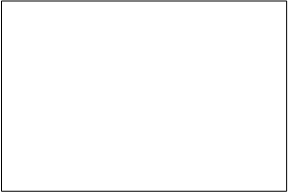

In [2]:
Image('fig_1.png')

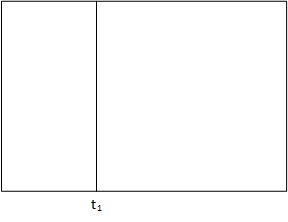

In [3]:
Image('fig_2.png')

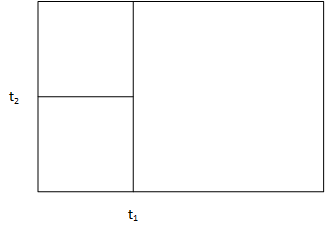

In [387]:
Image('fig_3.png')

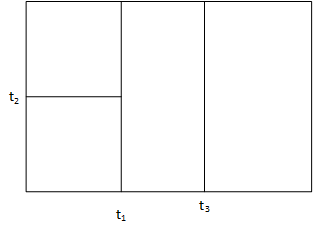

In [388]:
Image('fig_4.png')

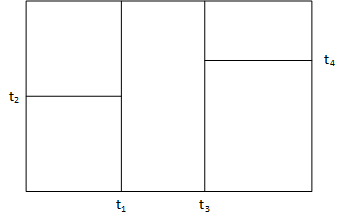

In [389]:
Image('fig_5.png')

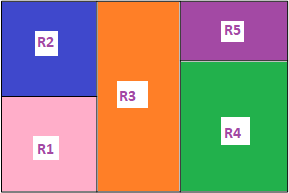

In [4]:
Image('fig_6.png')

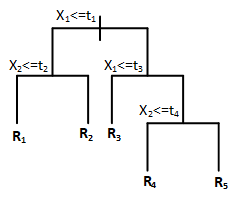

In [5]:
Image('fig_7.png')

## Một số vấn đê về xây dựng cây

Gốc của cây chứa tất cả dữ liệu, các node trung gian, các node lá.
- Các node được chia nhị phân: 
    - Chọn một thuộc tính $X_i$
    - Chọn một điểm chia $t_j$

- Độ sâu của cây?
- Số mẫu trong mỗi node lá?
- Số node lá lớn nhất?

** Root node (Nút gốc)**: Chứa toàn bộ dữ liệu mẫu. Dữ liệu này được chia thành các nhóm nhỏ hơn

** Splitting (Phân nhóm)**: Là quá trình chia các nhóm thành các nhóm nhỏ hơn

** Decision node (Nút quyết định)**: Là các nút tiếp tục được phân chia

** Leaf node (Nút lá) **: Là các nút không được phân chia

** Prunning (Tỉa cành)**: Loại bỏ một số nút phụ của cây

** Sub-Tree (nhánh)**: Là một bộ phận của cây

** Parent and Child node (Nút cha và nút con)**: Nút bị chia thành các nút phụ gọi là nút cha, các nút phụ của nút cha gọi là nút con

### Ưu và nhược điểm của cây quyết định

- **Ưu điểm:**
    - Dễ hiểu: Cây biểu diễn trực quan
    - Hữu ích: Xác định được các biến quan trọng
    - Phi tham số: không cần giả định về phân phối
    - Không phục thuộc vào dữ liệu: Có thể áp dụng cả dữ liệu phân loại và liên tục
- **Nhược điểm:**
    - Dễ bị quá khớp (overfitting)

## Phân loại dựa trên cây quyết định
- Cho dữ liệu $(x_i,y_i)$ với $y_i\in \{1,2,\dots,K\}$ chia thành $K$ nhóm.
- Với mỗi nút $m$ biểu diễn bởi miền $R_m$ với $N_m$ quan sát. Ta tính $p_{mk}$ là tỷ lệ các quan sát thuộc nhóm $k$ tại nút $m$: $$p_{mk}=\dfrac{1}{N_m}\sum\limits_{x_i\in R_m}I_{[y_i=k]} $$
- Nút $m$ phân loại thành nhóm có tỷ lệ cao nhất $$k(m)=\arg\max_k \{p_{mk}\}$$


** Độ đo đồng nhất cho mỗi nút**
- Với mỗi nút $m$ ta đo độ đồng nhất của mỗi nút
    - Xác suất phân loại sai (missclassification error): $$Q_m=\dfrac{1}{N_m}\sum\limits_{x_i\in R_m}I_{[y_i\ne k]}=1-p_{kk(m)}  $$
    - Chỉ số Gini: $$Q_m=\sum\limits_{k\ne l} p_{mk}p_{ml}=\sum\limits_{k=1}^K p_{mk}(1-p_{mk})=1-\sum\limits_{k=1}^K p^2_{mk} $$
    - Entropy chéo (cross-entropy): $$ Q_m=-\sum\limits_{k=1}^K p_{mk}\log p_{mk}$$

**Thuật toán:**
- Với mỗi nút ( không phải nút lá):
    - Với mỗi biến $X_k$:
        - Tìm điểm cắt tối ưu $s$ $$s=\arg\min_s \big[Q(X_k,s)=Q(x_{ik}\le s)+Q(x_{ik}> s)\big], $$  
    - Chọn biến $X_k$ và $s$ với $Q(X_k,s)$ bé nhất
- Lặp đến khi đạt đến điều kiện dừng

## Hồi quy dựa trên cây quyết định

Giả sử ta có các mẫu quan sát $(x_i,y_i), i=1,2,\dots, N$ với $x_i=(x_{i1},x_{i2},\dots,x_{ip})$. 

- Ta xây dựng thuật toán tự động chia miền chứa các biến $x_i$ thành các hình chữ nhật $R_m$
- Ta mô tả hàm hồi quy $$y=f(x)=\sum\limits_{m=1}^M c_m I_{(x\in R_m)} $$

hàm $I_{(x\in R_m)}=1$ nếu $x\in R_m$ và $I_{(x\in R_m)}=0$ nếu $x\not\in R_m$
- Hàm hồi quy được xây dựng bằng phương pháp bình phương tối thiểu $$SSE=\sum\limits_{i=1}^N (y_i-f(x_i))^2. $$
- Ta có thể biểu diễn $$SSE=\sum\limits_{m=1}^M \sum\limits_{x_i\in R_m} (y_i-c_m)^2. $$ Giá trị $c_m$ là giá trị trung bình của các giá trị $y_i$ trong miền $R_m$, nghĩa là $$c_m={\bf mean}(y_i: x_i\in R_m). $$

**Thuật toán:**
- Với mỗi nút ( không phải nút lá):
    - Với mỗi biến $X_k$:
        - Tìm điểm cắt tối ưu $s$ $$\arg\min_s \big[\sum\limits_{x_{ik}\le s}(y_i-c_1)^2+\sum\limits_{x_{ik}> s}(y_i-c_2)^2\big], $$ với  $c_1={\bf mean} (y_i: x_{ik}\le s)$ và $c_2={\bf mean} (y_i: x_{ik}> s)$ 
    - Chọn biến $X_k$ và $s$ với $SSE$ bé nhất
- Lặp đến khi đạt đến điều kiện dừng

# Định giá tín dụng cá nhân

## Tính điểm tín dụng (Credit Scoring)
- Các ngân hàng đối mặt với các rủi ro tín dụng (vỡ nợ)
- Đánh giá tín dụng có thể áp dụng trí tuệ nhân tạo. Đánh giá khả năng chi trả:
    - Đúng hạn
    - Trễ hạn
    - Không đủ khả năng thanh toán


## Mô hình tính điểm tín dụng
- Mô hình cây quyết định
- Mô hình rừng ngẫu nhiên
- Mô hình hồi quy logistic

## Dữ liệu Kaggle
- Tập huấn luyện: cs-training.csv
- Tập kiểm tra: cs-test.csv

In [11]:
import pandas as pd
import numpy as np

In [12]:
train = pd.read_csv("data/cs-training.csv")

### Kiểm tra dữ liệu bị mất (NaN)

In [13]:
train.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [14]:
train.shape

(150000, 12)

In [15]:
train = train.drop(train.columns.values[0],axis=1)

In [16]:
train.shape

(150000, 11)

In [17]:
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [18]:
train.columns.values

array(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype=object)

In [19]:
data_features = pd.read_excel("data\DataDictionary.xls")

In [20]:
data_features

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


**Missing **
- 29731, MonthlyIncome
- 3924, NumberOfDependents


**Removal missing data**

In [21]:
train_no_missing = train.dropna() # remove missing values

In [22]:
train_no_missing.shape

(120269, 11)

**Imputation by mean**

In [23]:
train_imputer = train

In [24]:
train_imputer["MonthlyIncome"].fillna(train_imputer["MonthlyIncome"].mean(), inplace=True)

In [25]:
train_imputer["NumberOfDependents"].fillna(train_imputer["NumberOfDependents"].mean(), inplace=True)

In [26]:
train_imputer.shape

(150000, 11)

### Dữ liệu huấn luyện

In [27]:
x_train = train_no_missing.drop(train_no_missing.columns.values[0],axis=1)

In [28]:
x_train.shape

(120269, 10)

In [29]:
y_train = train_no_missing[train.columns.values[0]]

In [30]:
y_train.shape

(120269,)

In [31]:
y_train.head()

0    1
1    0
2    0
3    0
4    0
Name: SeriousDlqin2yrs, dtype: int64

## Mô hình học máy (Decision Tree Classification)

### Đối với dữ liệu loại bỏ các bản ghi bị lỗi

In [32]:
print(x_train.shape, y_train.shape)

(120269, 10) (120269,)


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1,stratify=y_train, random_state=42)
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(108242, 10) (108242,) (12027, 10) (12027,)


In [35]:
y_test_values = y_test.values
num_ones = np.count_nonzero(y_test_values)
num_zeros = len(y_test_values) - num_ones
print(num_ones)
print(num_zeros)

836
11191


In [36]:
classifier = DecisionTreeClassifier(max_depth=6)

In [37]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [38]:
classifier.score(x_train, y_train)

0.9355241033979417

In [39]:
features = x_train.columns.values

In [44]:
from sklearn.tree import export_graphviz 
export_graphviz(classifier, out_file='tree_credit.dot', feature_names=features)
!dot -Tpng tree_credit.dot > tree_credit.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [42]:
# Hiển thị file ảnh
from IPython.display import Image
Image(filename='tree_credit.png')

In [45]:
classifier.feature_importances_

array([0.16764285, 0.0099315 , 0.11162927, 0.00956323, 0.0107478 ,
       0.00808028, 0.57996257, 0.00668756, 0.09412035, 0.00163458])

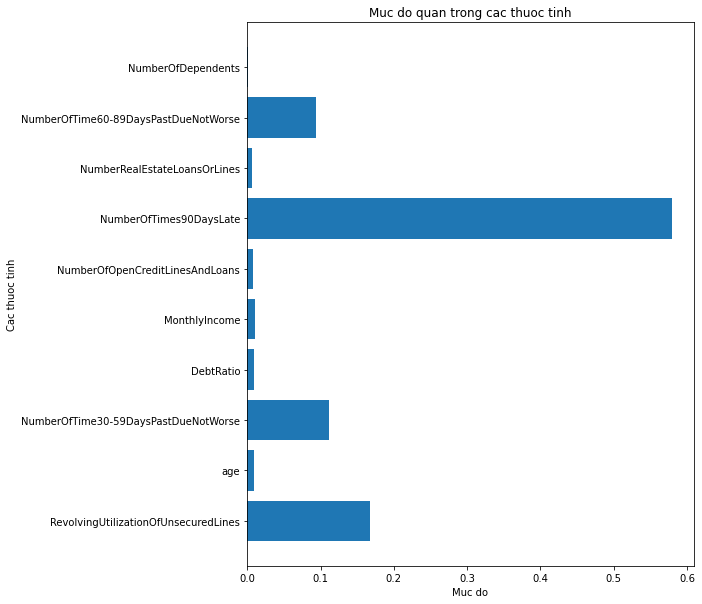

In [46]:
import matplotlib.pyplot as plt
n = len(features)
plt.figure(figsize = (8,10))
plt.barh(range(n), classifier.feature_importances_)
plt.yticks(range(n), features)
plt.title('Muc do quan trong cac thuoc tinh')
plt.ylabel('Cac thuoc tinh')
plt.xlabel('Muc do')
plt.show()

In [47]:
y_predict = classifier.predict(x_test)

In [48]:
y_predict[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [49]:
import matplotlib.pyplot as plt

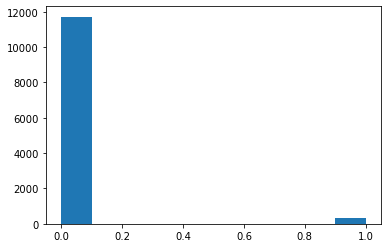

In [50]:
plt.hist(y_predict,bins=10)
plt.show()

In [51]:
classifier.score(x_train, y_train)

0.9355241033979417

In [52]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
f1score = f1_score(y_predict, y_test,average = 'micro')
print(f1score)
'''
depth = 10 0.2503647505106507
depth = 25 0.25838304875540014
depth = 5  0.28529150636282924 
depth = 6  0.93281782655691366  MAX
depth = 7  0.24261083743842363
depth = 8  0.2626918536009445
'''

0.9328178265569136


'\ndepth = 10 0.2503647505106507\ndepth = 25 0.25838304875540014\ndepth = 5  0.28529150636282924 \ndepth = 6  0.93281782655691366  MAX\ndepth = 7  0.24261083743842363\ndepth = 8  0.2626918536009445\n'

### Đối với dữ liệu Imputer


In [53]:
print(train_imputer.shape)

(150000, 11)


In [54]:
x_train = train_imputer.drop(train_imputer.columns.values[0], axis=1)
y_train = train_imputer[train_imputer.columns.values[0]]

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(135000, 10) (135000,) (15000, 10) (15000,)


In [56]:
# dt_classifier = DecisionTreeClassifier(min_samples_leaf=10)
dt_classifier = DecisionTreeClassifier(max_depth=6)
# dt_classifier = DecisionTreeClassifier(max_leaf_nodes=100)

In [57]:
dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [58]:
from sklearn.tree import export_graphviz 
export_graphviz(dt_classifier, out_file='tree_credit_imputer.dot', feature_names=features)
! dot -Tpng tree_credit_imputer.dot > tree_credit_imputer.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [59]:
y_pred_imputer = dt_classifier.predict(x_test)

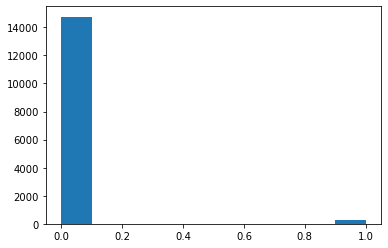

In [61]:
plt.hist(y_pred_imputer, bins=10)
plt.show()

In [62]:
dt_classifier.score(x_train, y_train)

0.9375555555555556

In [65]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
f1score = f1_score(y_pred_imputer, y_test,average = 'micro')
print(f1score)

'''

'''

0.9364666666666667


'\n\n'